In [8]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utilities import calculate_psnr, calculate_rmse, calculate_ssim
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [2]:
psnr = {}
ssim = {}
rmse = {}
model_paths = np.sort(glob("checkpoint/model2/finetune/**/g_final.pth", recursive=True))
for model_path in model_paths:
    print(model_path)
    key = os.path.basename(os.path.dirname(model_path))
    gts = np.sort(glob(os.path.dirname(model_path)+"/results/gt_*.npy"))
    fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
    masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
    ssim_temp, psnr_temp, rmse_temp = [], [], []
    for gt, fake, mask in zip(gts, fakes, masks):
        fake = np.load(fake)
        gt = np.load(gt)
        mask = np.ma.make_mask(np.load(mask)[:, :, 0])
        ssim_temp.append(calculate_ssim(gt, fake, mask))
        psnr_temp.append(calculate_psnr(gt, fake, mask))
        rmse_temp.append(calculate_rmse(gt, fake, mask))
    ssim[key] = np.median(ssim_temp)
    psnr[key] = np.median(psnr_temp)
    rmse[key] = np.median(rmse_temp)
with open("results/model2/model2_metrics.csv", "w") as f:
    header = ['iters', 'ssim', 'psnr', 'rmse']
    writer = csv.writer(f)
    writer.writerow(header)
    for (k, s, p, r) in zip(ssim.keys(), ssim.values(), psnr.values(), rmse.values()):
        row = [k]
        row += [s] + [p] + [r]
        writer.writerow(row)

checkpoint/model2/finetune/1000+500/g_final.pth


checkpoint/model2/finetune/10000+5000/g_final.pth
checkpoint/model2/finetune/11000+5500/g_final.pth
checkpoint/model2/finetune/12000+6000/g_final.pth
checkpoint/model2/finetune/13000+6500/g_final.pth
checkpoint/model2/finetune/14000+7000/g_final.pth
checkpoint/model2/finetune/15000+7500/g_final.pth
checkpoint/model2/finetune/16000+8000/g_final.pth
checkpoint/model2/finetune/17000+8500/g_final.pth
checkpoint/model2/finetune/18000+9000/g_final.pth
checkpoint/model2/finetune/19000+9500/g_final.pth
checkpoint/model2/finetune/2000+1000/g_final.pth
checkpoint/model2/finetune/20000+10000/g_final.pth
checkpoint/model2/finetune/3000+1500/g_final.pth
checkpoint/model2/finetune/30000+15000/g_final.pth
checkpoint/model2/finetune/4000+2000/g_final.pth
checkpoint/model2/finetune/40000+20000/g_final.pth
checkpoint/model2/finetune/5000+2500/g_final.pth
checkpoint/model2/finetune/50000+25000/g_final.pth
checkpoint/model2/finetune/6000+3000/g_final.pth
checkpoint/model2/finetune/7000+3500/g_final.pth
ch

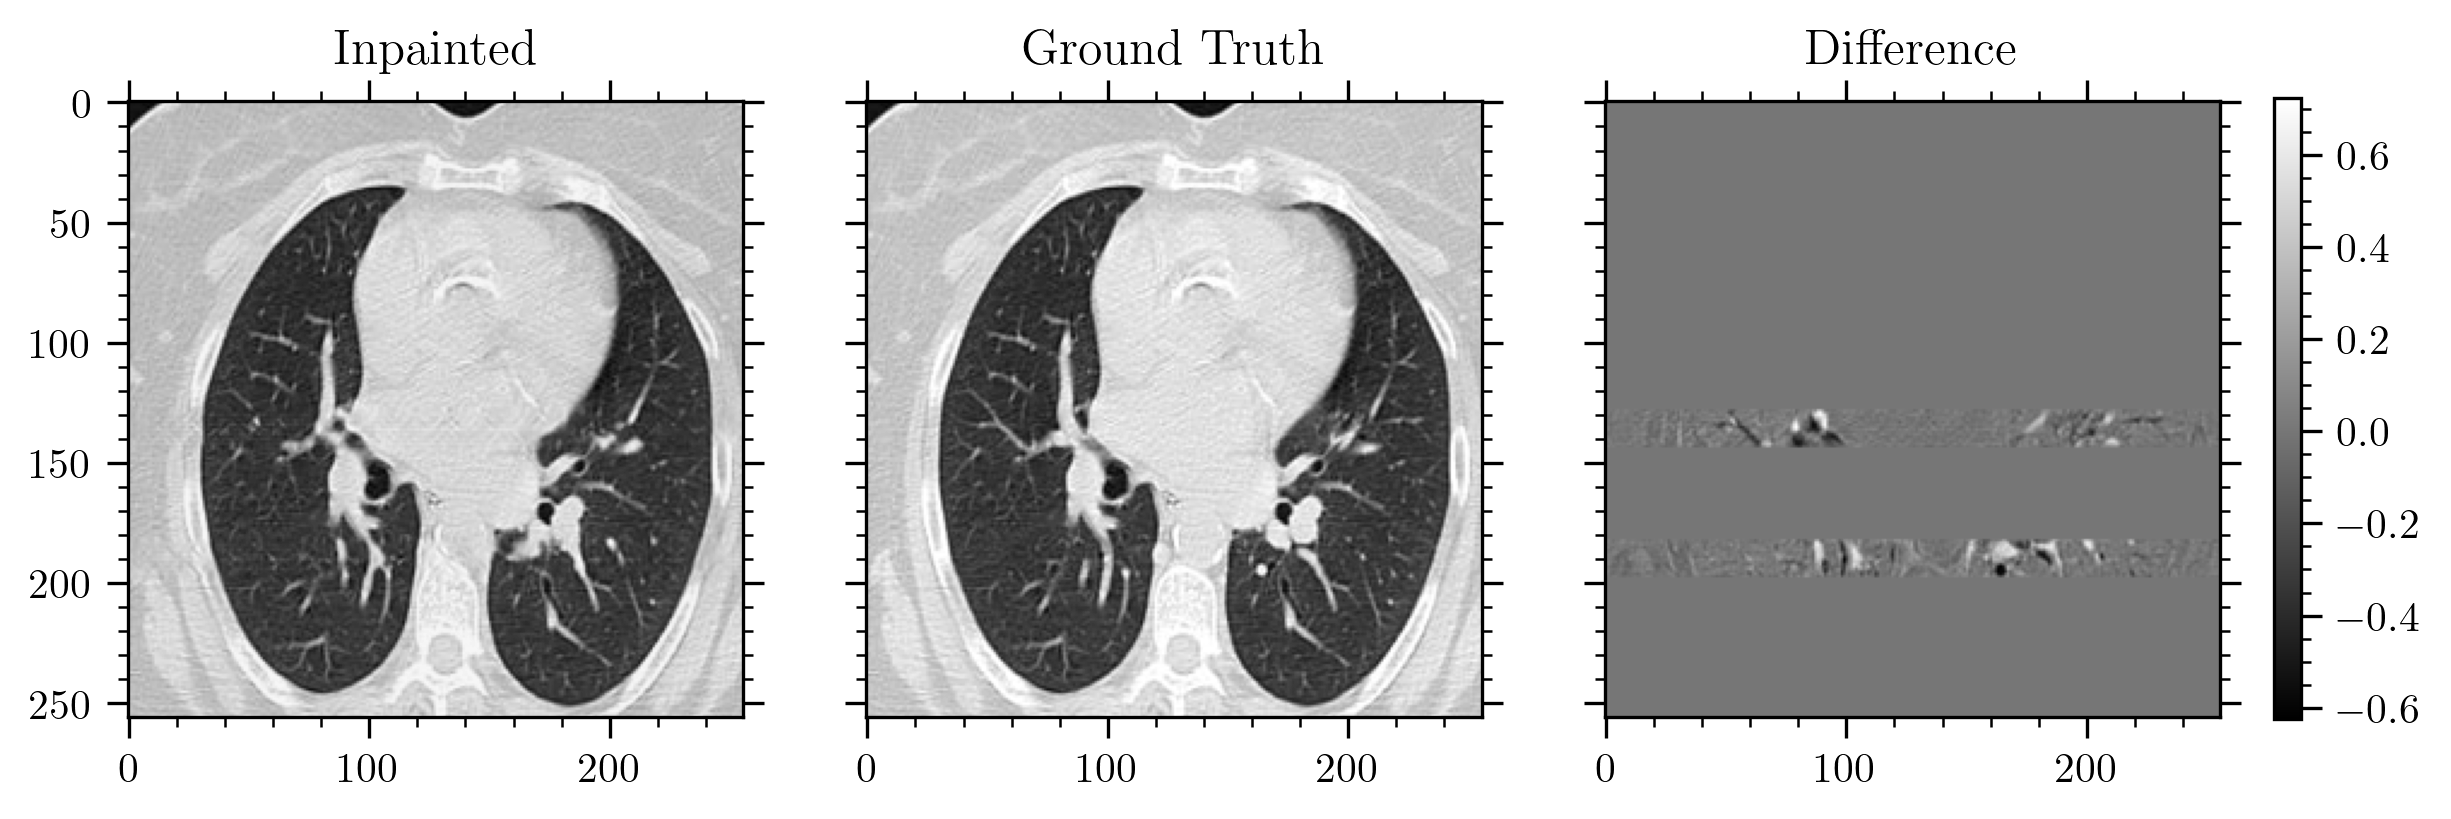

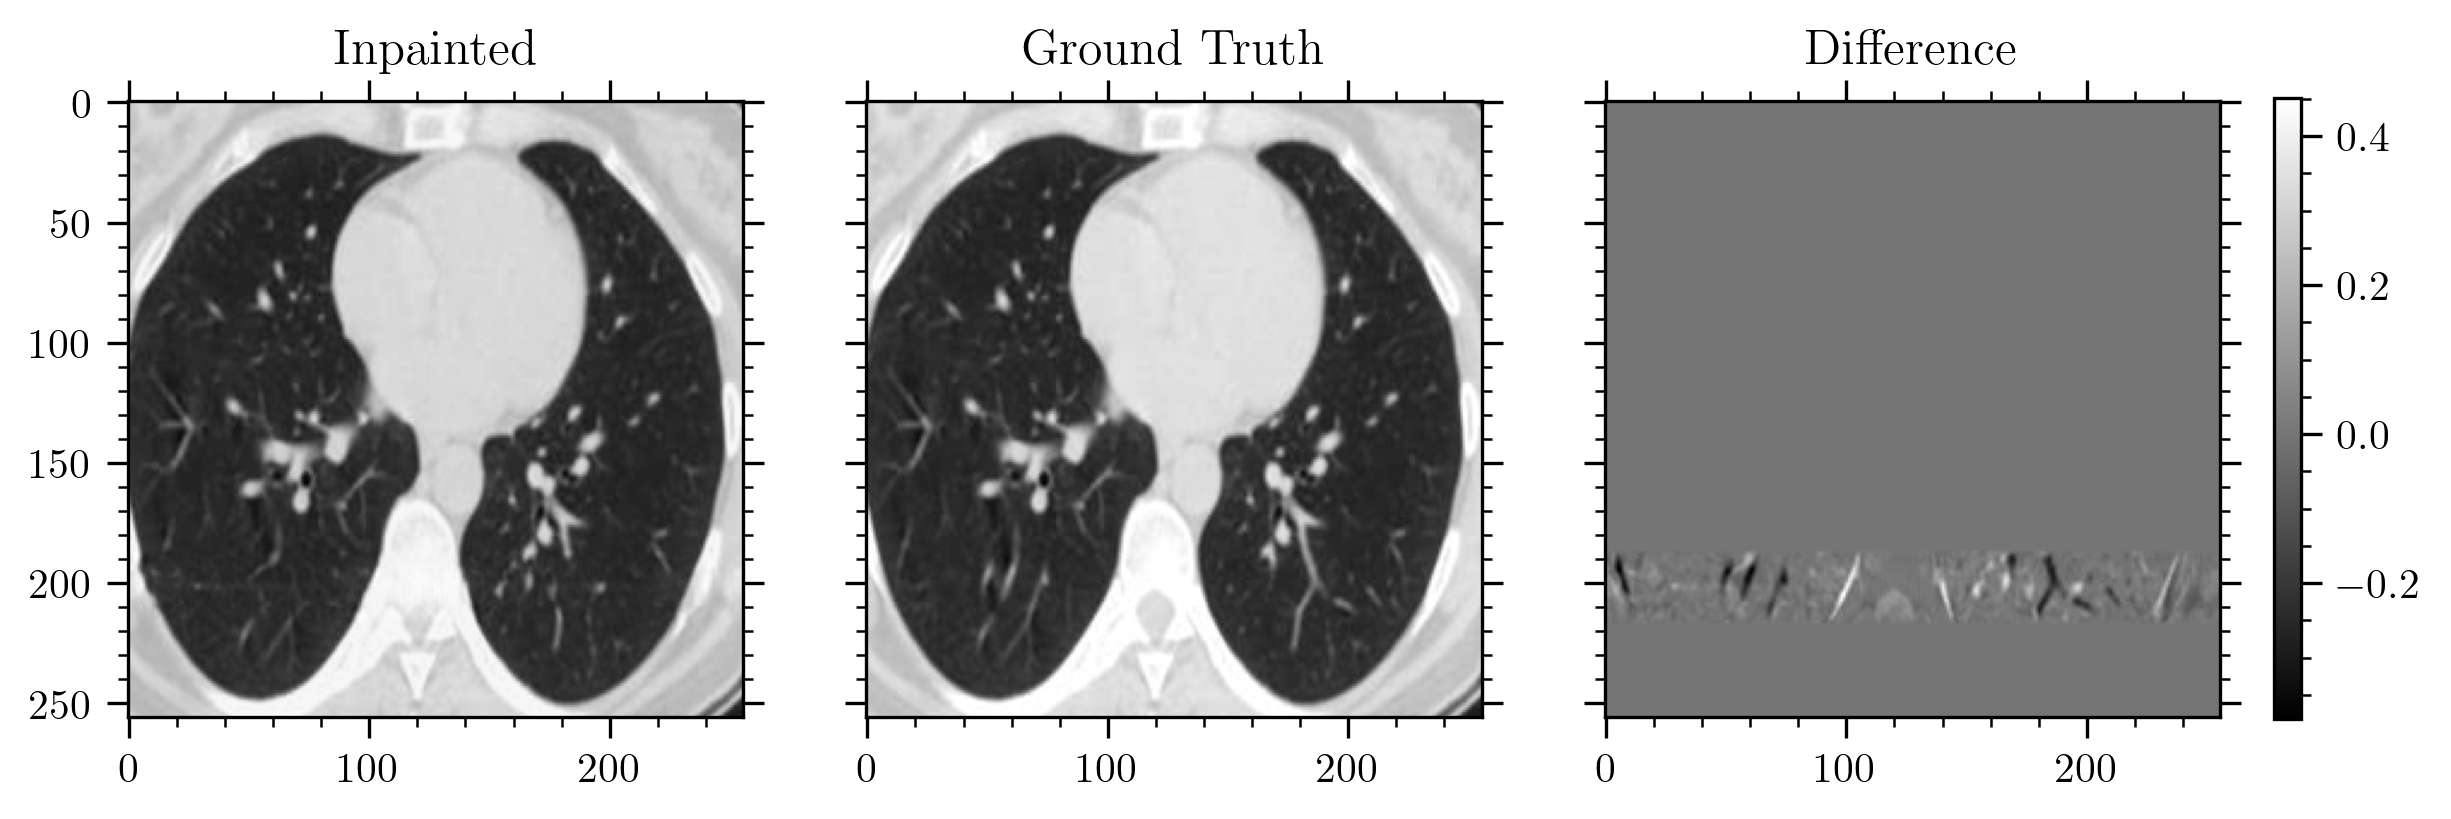

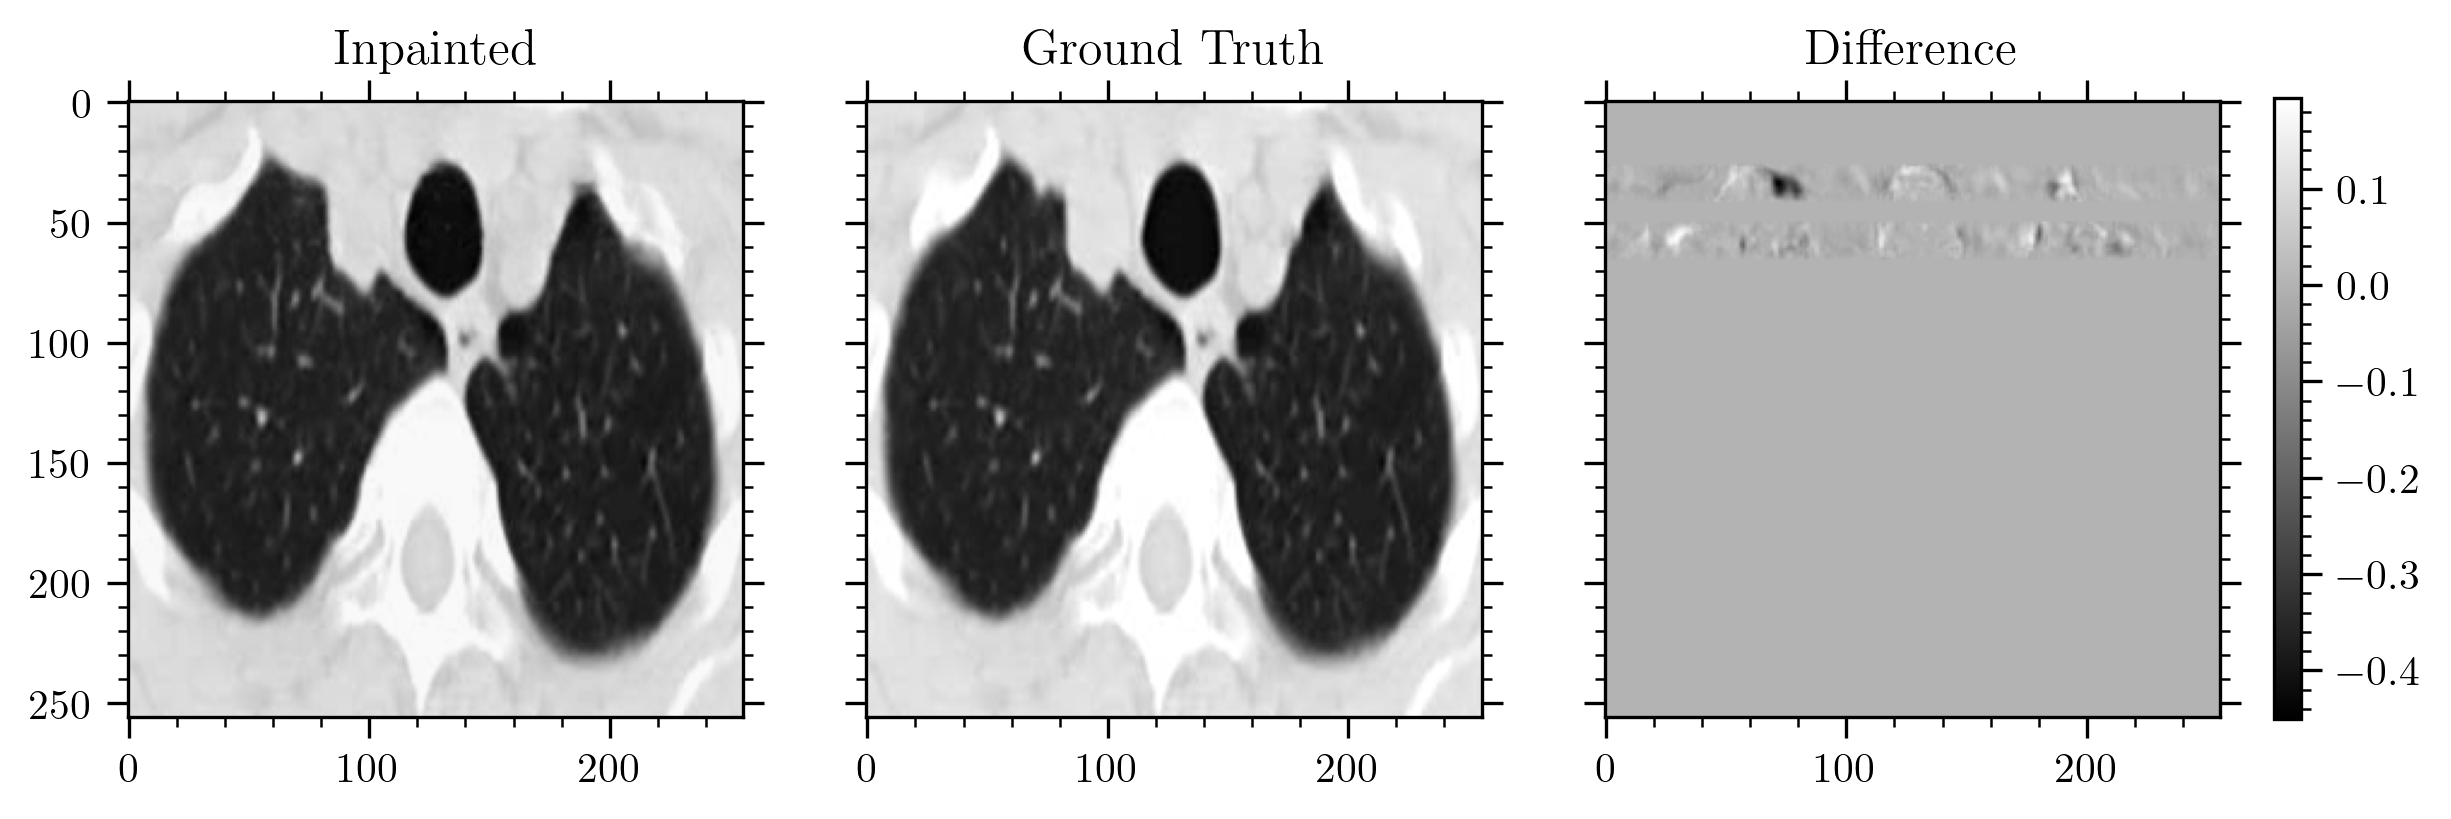

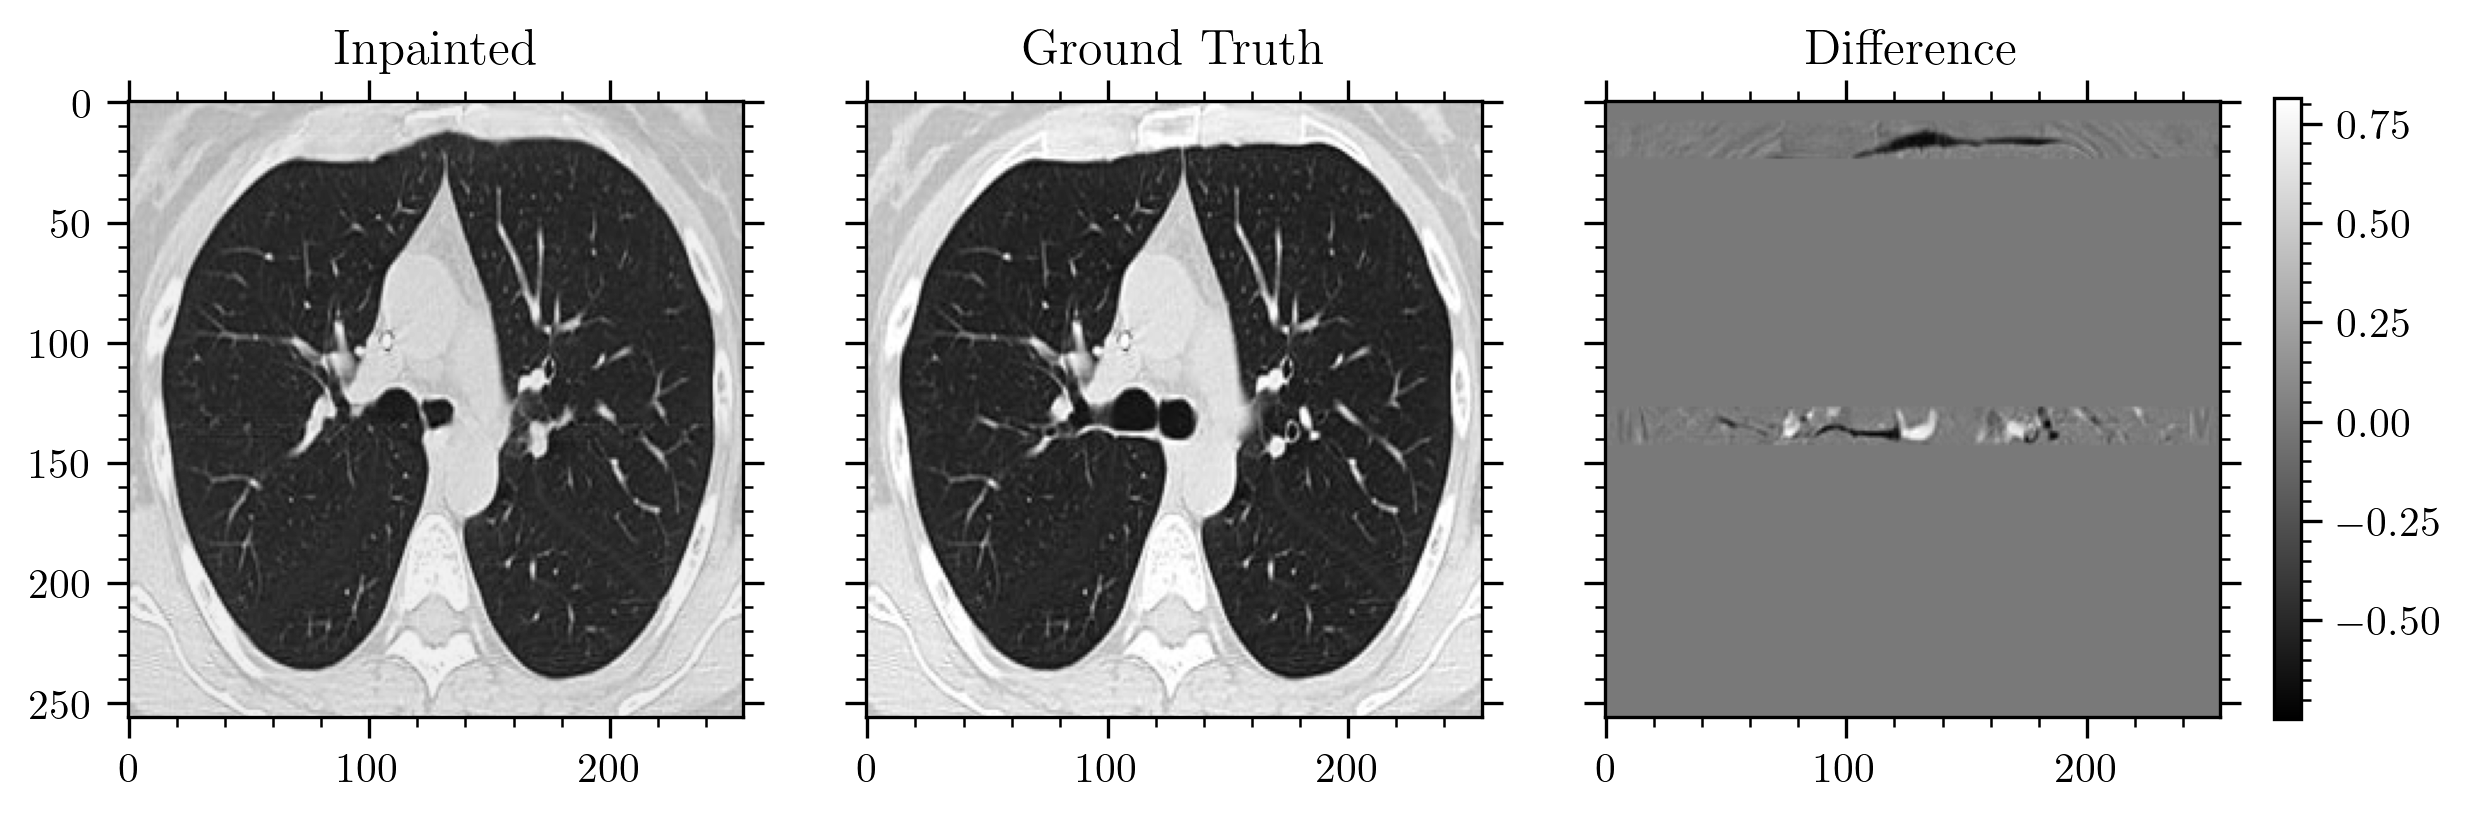

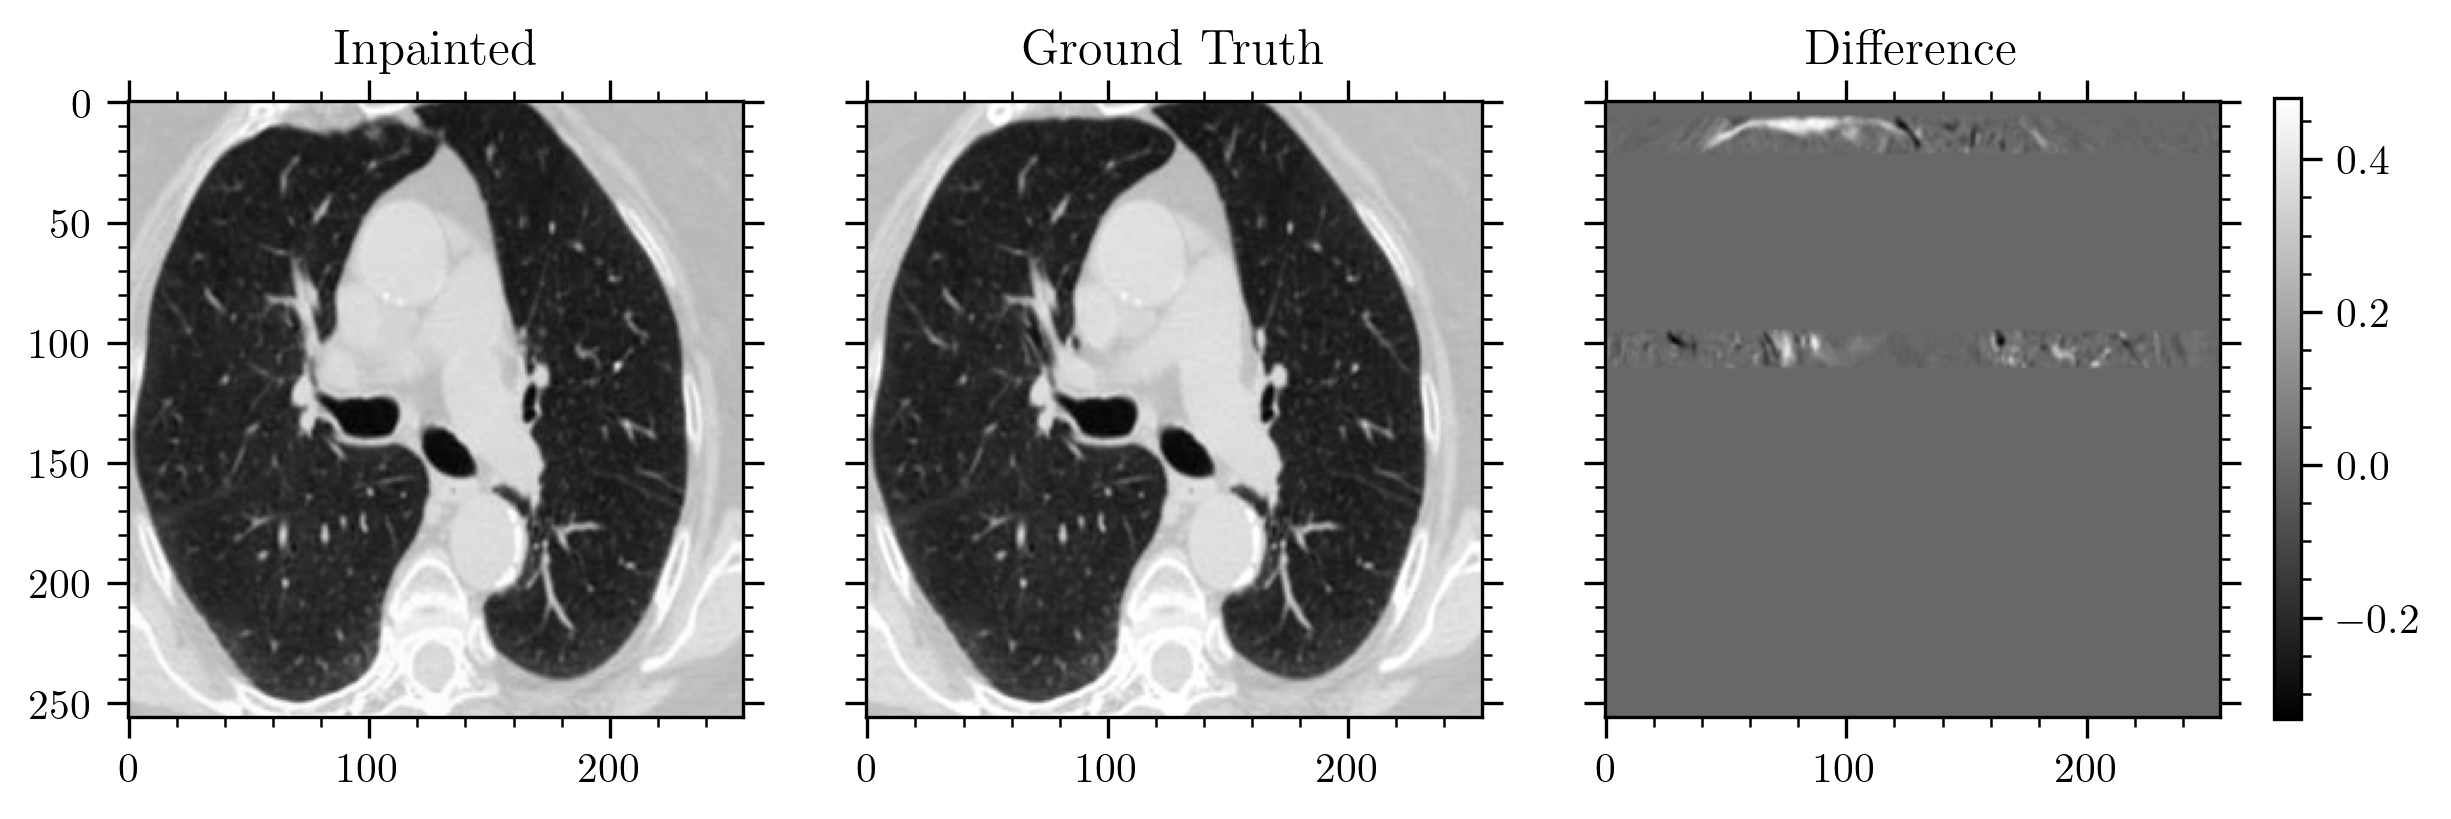

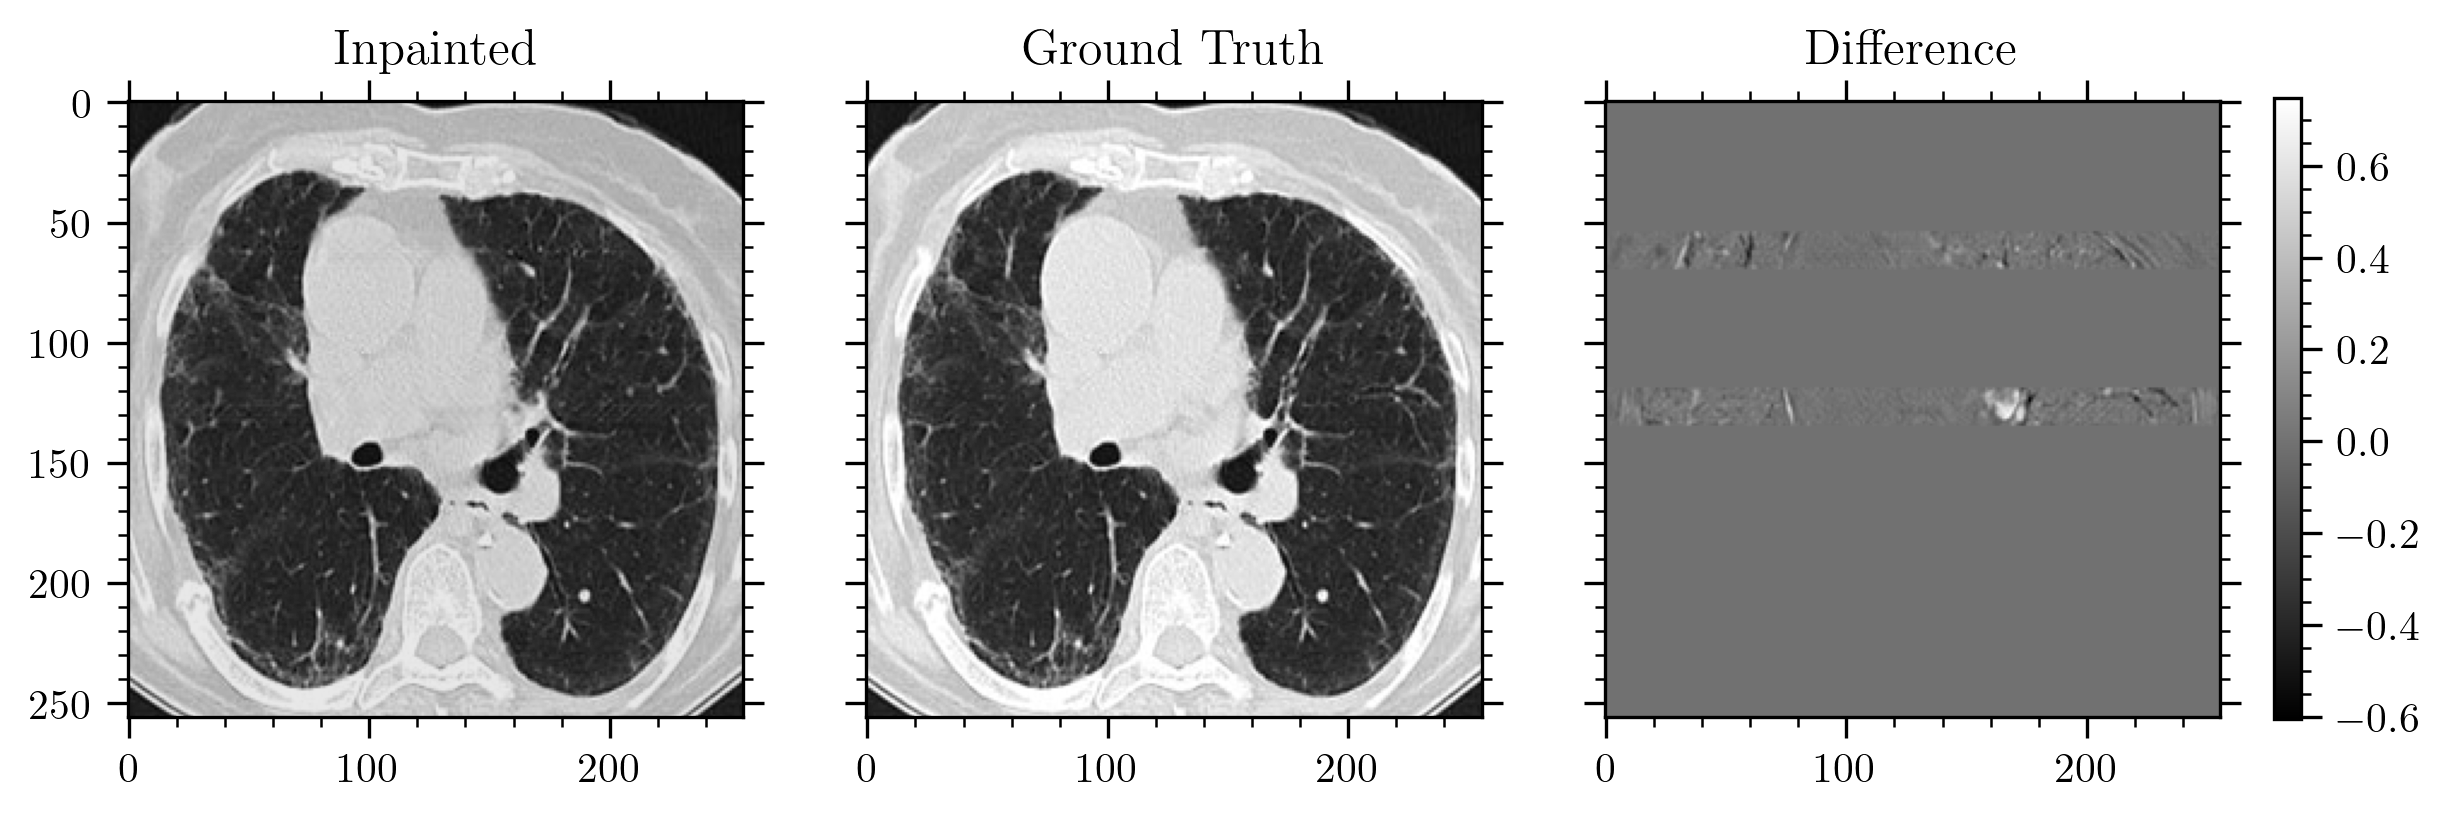

In [22]:
model_path = "checkpoint/model2/finetune/19000+9500/g_final.pth"

key = os.path.basename(os.path.dirname(model_path))
gts = np.sort(glob(os.path.dirname(model_path)+"/results/gt_*.npy"))
fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
counter = 0
for gt, fake, mask in zip(gts, fakes, masks):
    fake = np.load(fake)
    gt = np.load(gt)
    mask = np.ma.make_mask(np.load(mask)[:, :, 0])
    fig, ax = plt.subplots(1, 3, figsize=(9, 3), dpi=300, sharey=True)
    ax[0].imshow(fake, cmap='gray')
    ax[0].set_title("Inpainted", y=1.02)
    ax[1].imshow(gt, cmap='gray')
    ax[1].set_title("Ground Truth", y=1.02)
    img = ax[2].imshow((fake-gt), cmap='gray')
    ax[2].set_title("Difference", y=1.02)
    cax = fig.add_axes([0.92, 0.15, 0.01, 0.69])
    plt.colorbar(img, cax=cax)
    counter += 1
    if counter > 5:
        break

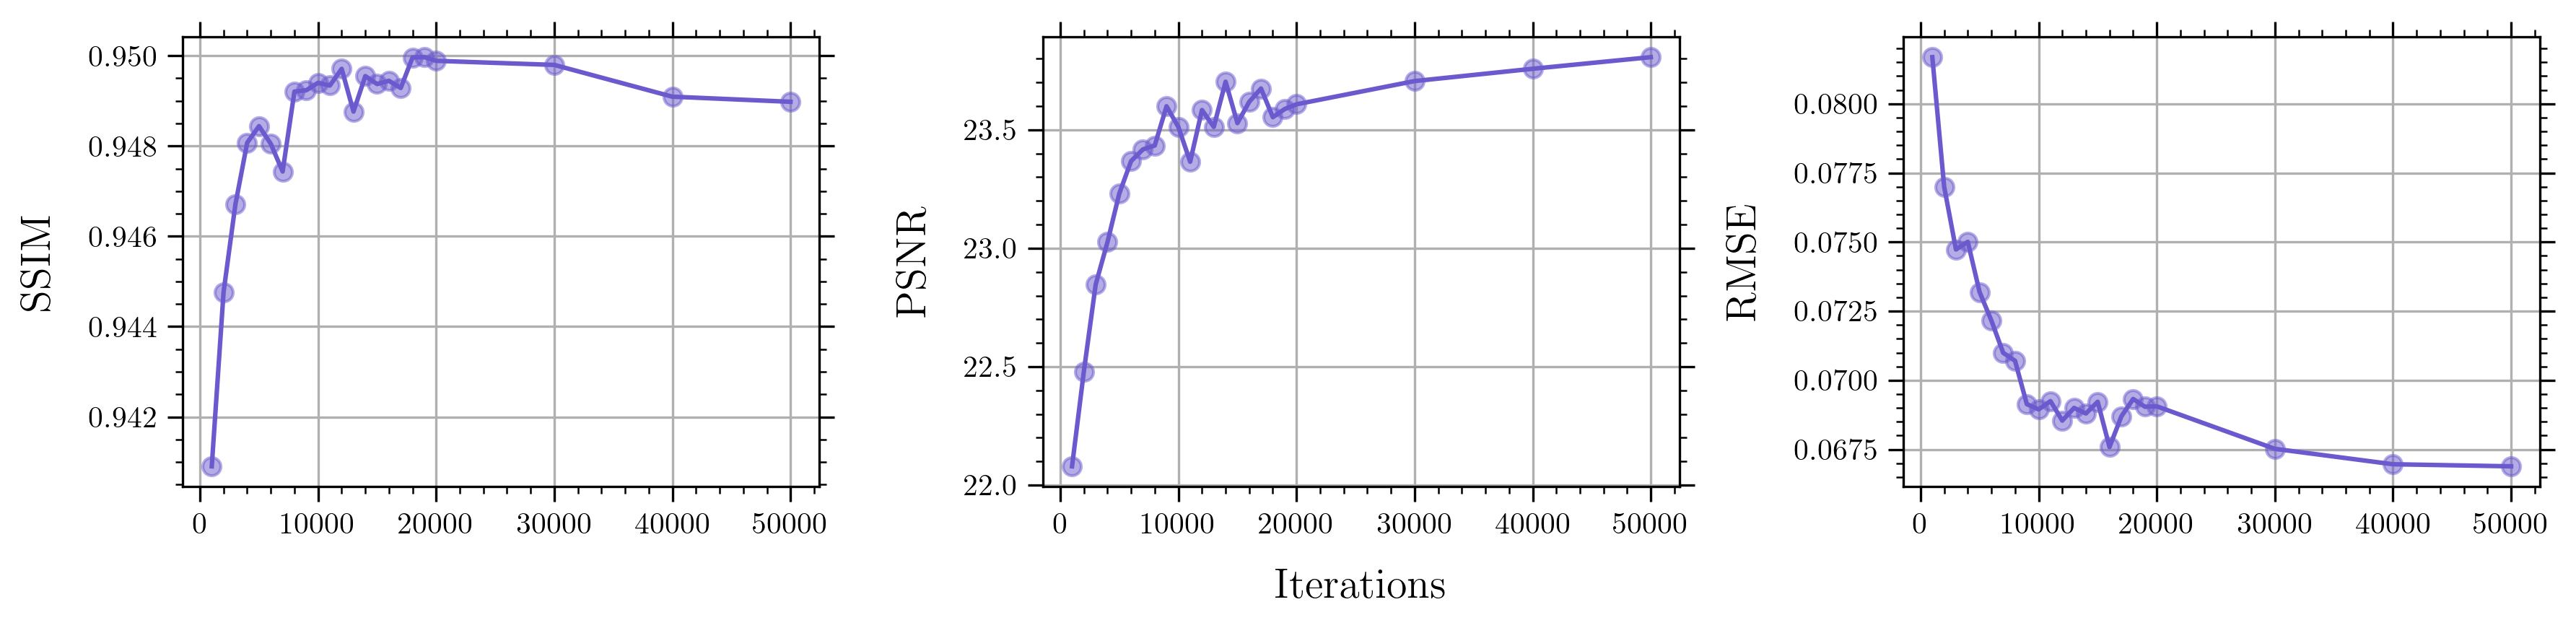

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=300)
metrics = pd.read_csv("results/model2/model2_metrics.csv")
x = np.array([int(x.split("+")[0]) for x in metrics['iters']])
sort = np.argsort(x)
x = x[sort]

for i, name in enumerate(['SSIM', 'PSNR', 'RMSE']):
    y = np.array([float(y) for y in metrics[name.lower()]])[sort]
    ax[i].plot(x, y, color='slateblue')
    ax[i].scatter(x, y, color='slateblue', alpha=0.5)
    ax[i].set_ylabel(f"{name}", labelpad=10, fontsize=14)
    if i==1:
        ax[i].set_xlabel(f"Iterations", labelpad=10, fontsize=14)
    ax[i].grid()
    i += 1
fig.tight_layout()
fig.savefig(f"results/model2/model2_metrics.png")